In [2]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# !pip install pipelinehelper
from pipelinehelper import PipelineHelper

In [4]:
data = pd.read_csv('full_data.csv')
data =  data.loc[~data.isnull().any(axis = 1),]
data.shape

(2468, 25)

In [20]:
data = data.loc[(data['BERT-GS_Scores'] > 1) | (data['BERT-GS_Scores'] < -1)]

In [21]:
data.columns

Index(['duration', 'end', 'end_idx', 'file', 'line', 'onset_count',
       'onset_rate', 'onset_time_diff_mean', 'onset_time_diff_var',
       'pitch_25pct', 'pitch_2pct', 'pitch_50pct', 'pitch_75pct',
       'pitch_98pct', 'pitch_log_diff_variance', 'pitch_log_mean',
       'pitch_log_stdev', 'speaker', 'speaker_role', 'start', 'start_idx',
       'text', 'word_count', 'word_rate', 'BERT-GS_Scores'],
      dtype='object')

In [22]:
X = data[['onset_count', 'duration', 'word_rate',
       'onset_rate', 'onset_time_diff_mean', 'onset_time_diff_var',
       'pitch_25pct', 'pitch_2pct', 'pitch_50pct', 'pitch_75pct',
       'pitch_98pct', 'pitch_log_diff_variance', 'pitch_log_mean',
       'pitch_log_stdev',]]
y = data['BERT-GS_Scores']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(308, 14) (78, 14)


In [24]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('max', MaxAbsScaler()),
        ('none', FunctionTransformer(lambda x: x))
    ])),
    ('regressors', PipelineHelper([
        ('lr', linear_model.LinearRegression()),
#         ('ridge', linear_model.Ridge()),
#         ('lasso', linear_model.Lasso()),
        ('elastic', linear_model.ElasticNet())
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True, False],
        'std__with_std': [True, False],
        'max__copy': [True],  # just for displaying
    }),
    'regressors__selected_model': pipe.named_steps['regressors'].generate({
        'lr__fit_intercept': [True],
#         'ridge__alpha': [2**i for i in [-2, -1, 0, 1, 2]],
#         'lasso__alpha': [0.1, 0.5, 1, 2, 10],
        'elastic__l1_ratio': [0, 0.1, .25, .5, .75, .9, 1],
        'elastic__alpha': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 10],
        
    })
}
grid = GridSearchCV(pipe, params, scoring='neg_mean_absolute_error', verbose=1)
grid.fit(X_test, y_test)


Fitting 5 folds for each of 342 candidates, totalling 1710 fits


C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.404669549718074, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.263114516660643, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.980802048324401, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\line

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.967324592344063, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.518616062436006, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.429190497338453, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\lin

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.457044938613766, tolerance: 0.007995613969653094
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.753474197738207, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.990993177540215, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\lin

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.000750961507464, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.987157842972955, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.16983922159134, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\line

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.343831957233686, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.808582102440518, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.45313232900085, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\line

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.148130971656876, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.94246544652081, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.23115826773763, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linea

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.622294804154308, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.102369185844562, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.71580515577279, tolerance: 0.008469967698472908
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\line

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.854368690317465, tolerance: 0.007995613969653094
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.29418111972833, tolerance: 0.00836056645162802
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.64394389651536, tolerance: 0.008495710816560044
  model = cd_fast.enet_coordinate_descent(
C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linea

C:\Users\yagne\.conda\envs\capstone\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.422457715405642, tolerance: 0.007995613969653094
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=Pipeline(steps=[('scaler',
                                        PipelineHelper(available_models={'max': MaxAbsScaler(),
                                                                         'none': FunctionTransformer(func=<function <lambda> at 0x00000227A6AF2E50>),
                                                                         'std': StandardScaler()})),
                                       ('regressors',
                                        PipelineHelper(available_models={'elastic': ElasticNet(),
                                                                         'lr': LinearRegression()}))]),
             param_grid={'regressors__selected_model': [('lr',
                                                         {'...
                                                         {'alpha': 0.5,
                                                          'l1_ratio': 1}),
                                                        ('elastic',
      

In [25]:
print(grid.best_params_)
print(grid.best_score_)

{'regressors__selected_model': ('elastic', {'alpha': 0.1, 'l1_ratio': 0.9}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': True})}
-0.5642109041888876


In [26]:
grid.best_estimator_.steps

[('scaler',
  PipelineHelper(available_models={'max': MaxAbsScaler(),
                                   'none': FunctionTransformer(func=<function <lambda> at 0x00000227A6AF2E50>),
                                   'std': StandardScaler()},
                 selected_model=StandardScaler())),
 ('regressors',
  PipelineHelper(available_models={'elastic': ElasticNet(alpha=0.1, l1_ratio=0.9),
                                   'lr': LinearRegression()},
                 selected_model=ElasticNet(alpha=0.1, l1_ratio=0.9)))]

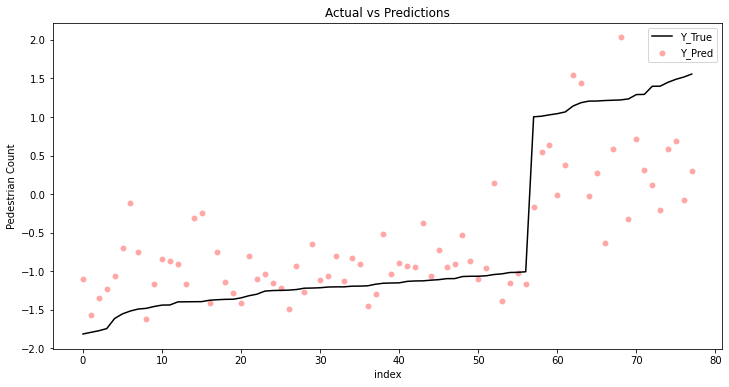

In [27]:
preds = grid.predict(X_test)
pred_df = pd.DataFrame(data={"y_true":y_test, "y_pred": preds})

pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
pred_df = pred_df.reset_index(drop = False)

figure, ax = plt.subplots(ncols = 1, figsize = (12,6))
g = sns.lineplot(x = 'index', y = 'y_true', data = pred_df, alpha = 1, label = 'Y_True', color = 'k')
g = sns.scatterplot(x = 'index', y = 'y_pred', data = pred_df, alpha = .35, label = 'Y_Pred', color = 'red')
plt.title('Actual vs Predictions')
plt.ylabel('Pedestrian Count')
plt.show()

In [36]:
data.corr()['BERT-GS_Scores']

duration                   0.467768
end                        0.129867
end_idx                    0.129867
line                       0.129036
onset_count                0.413466
onset_rate                -0.176120
onset_time_diff_mean       0.205145
onset_time_diff_var        0.206334
pitch_25pct               -0.108046
pitch_2pct                -0.105542
pitch_50pct               -0.102210
pitch_75pct               -0.065901
pitch_98pct               -0.021890
pitch_log_diff_variance    0.146865
pitch_log_mean             0.008569
pitch_log_stdev            0.052343
start                      0.123493
start_idx                  0.123493
word_count                 0.547280
word_rate                  0.327404
BERT-GS_Scores             1.000000
Name: BERT-GS_Scores, dtype: float64

In [29]:
import lightgbm as lgb

In [30]:
check2 = lgb.LGBMRegressor()

In [31]:
check2.fit(X_train, y_train)

LGBMRegressor()

In [32]:
check2.feature_importances_

array([ 52, 134, 129,  28,  53, 123,  98, 100,  63,  52,  67,  93,  46,
        84])

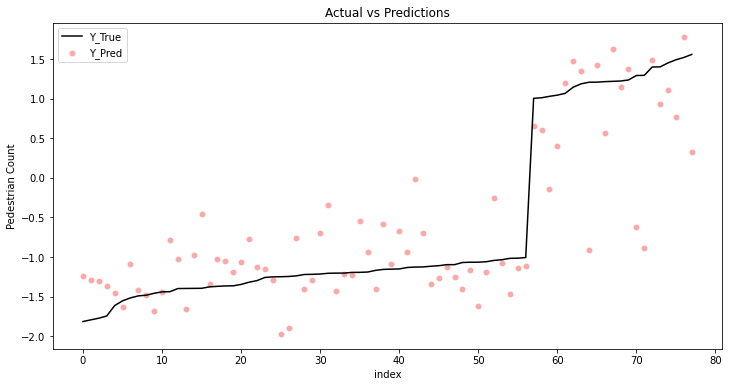

In [33]:
preds = check2.predict(X_test)
pred_df = pd.DataFrame(data={"y_true":y_test, "y_pred": preds})

pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
pred_df = pred_df.reset_index(drop = False)

figure, ax = plt.subplots(ncols = 1, figsize = (12,6))
g = sns.lineplot(x = 'index', y = 'y_true', data = pred_df, alpha = 1, label = 'Y_True', color = 'k')
g = sns.scatterplot(x = 'index', y = 'y_pred', data = pred_df, alpha = .35, label = 'Y_Pred', color = 'red')
plt.title('Actual vs Predictions')
plt.ylabel('Pedestrian Count')
plt.show()

(array([ 34., 134., 104.,   0.,   0.,   0.,   0.,  15.,  88.,  11.]),
 array([-1.8876965 , -1.52106224, -1.15442798, -0.78779372, -0.42115946,
        -0.0545252 ,  0.31210907,  0.67874333,  1.04537759,  1.41201185,
         1.77864611]),
 <BarContainer object of 10 artists>)

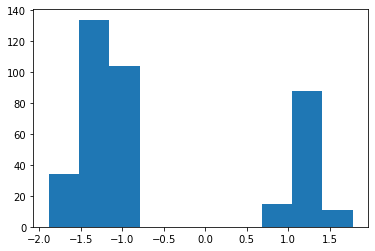

In [34]:
plt.hist(data['BERT-GS_Scores'])

In [35]:
data.loc[data['BERT-GS_Scores'] > 1]

,duration,end,end_idx,file,line,onset_count,onset_rate,onset_time_diff_mean,onset_time_diff_var,pitch_25pct,...,pitch_log_mean,pitch_log_stdev,speaker,speaker_role,start,start_idx,text,word_count,word_rate,BERT-GS_Scores
38,78.92,3633.96,58143360,19-123.wav,206,201.0,2.546883,0.387200,0.173537,171.367243,...,5.342765,0.288909,Stephen_G_Breyer,scotus_justice,3555.04,56880640,Yes. What's actually bothering me quite a lot ...,219,2.774962,1.217887
41,35.84,3855.40,61686400,19-123.wav,217,105.0,2.929688,0.337231,0.083356,161.982376,...,5.535161,0.642072,Samuel_A_Alito_Jr,scotus_justice,3819.56,61112960,"-- if that's the City's policy, then the state...",89,2.483259,1.408390
48,154.88,4643.84,74301440,19-123.wav,250,256.0,1.652893,0.604486,0.309621,172.608502,...,5.258944,0.260728,Brett_M_Kavanaugh,scotus_justice,4488.96,71823360,"Good morning, Mr. Katyal. I have kind of a big...",316,2.040289,1.513167
55,56.92,5371.84,85949440,19-123.wav,284,140.0,2.459592,0.406791,0.151880,164.576464,...,5.218052,0.241153,Stephen_G_Breyer,scotus_justice,5314.92,85038720,"In general, what have you thought should be th...",164,2.881237,1.074777
200,20.44,3644.48,58311680,19-1434.wav,178,63.0,3.082192,0.311742,0.048060,171.614350,...,5.778735,0.760711,Samuel_A_Alito_Jr,scotus_justice,3624.04,57984640,But -- but somebody has to make a choice about...,68,3.326810,1.206548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,17.00,474.08,7585280,19-1189.wav,23,41.0,2.411765,0.410400,0.184980,161.282664,...,5.330042,0.294357,Stephen_G_Breyer,scotus_justice,457.08,7313280,"-- I'm only saying, is there -- the evidence p...",67,3.941176,1.010587
2514,24.60,612.04,9792640,19-1189.wav,30,69.0,2.804878,0.356235,0.099717,201.740890,...,5.416503,0.142700,Sonia_Sotomayor,scotus_justice,587.44,9399040,-- I do know that we have some of my colleague...,70,2.845528,1.256051
2517,13.08,841.24,13459840,19-1189.wav,45,74.0,5.657492,0.165699,0.015384,121.001221,...,4.978789,0.167652,Neil_Gorsuch,scotus_justice,828.16,13250560,"-- I mean, you know, you're -- you're as famil...",57,4.357798,1.291427
2527,9.76,1820.20,29123200,19-1189.wav,111,27.0,2.766393,0.343385,0.077159,188.230906,...,5.375697,0.171134,Elena_Kagan,scotus_justice,1810.44,28967040,-- I guess I don't understand your argument. I...,56,5.737705,1.108210


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))